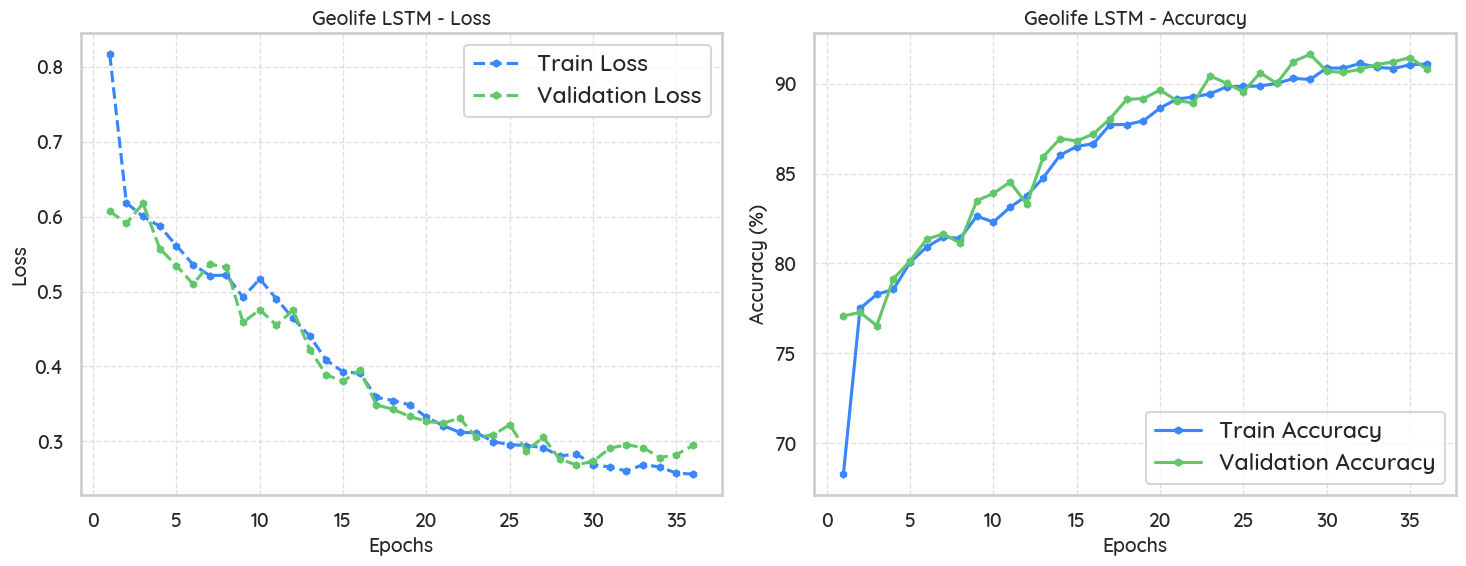

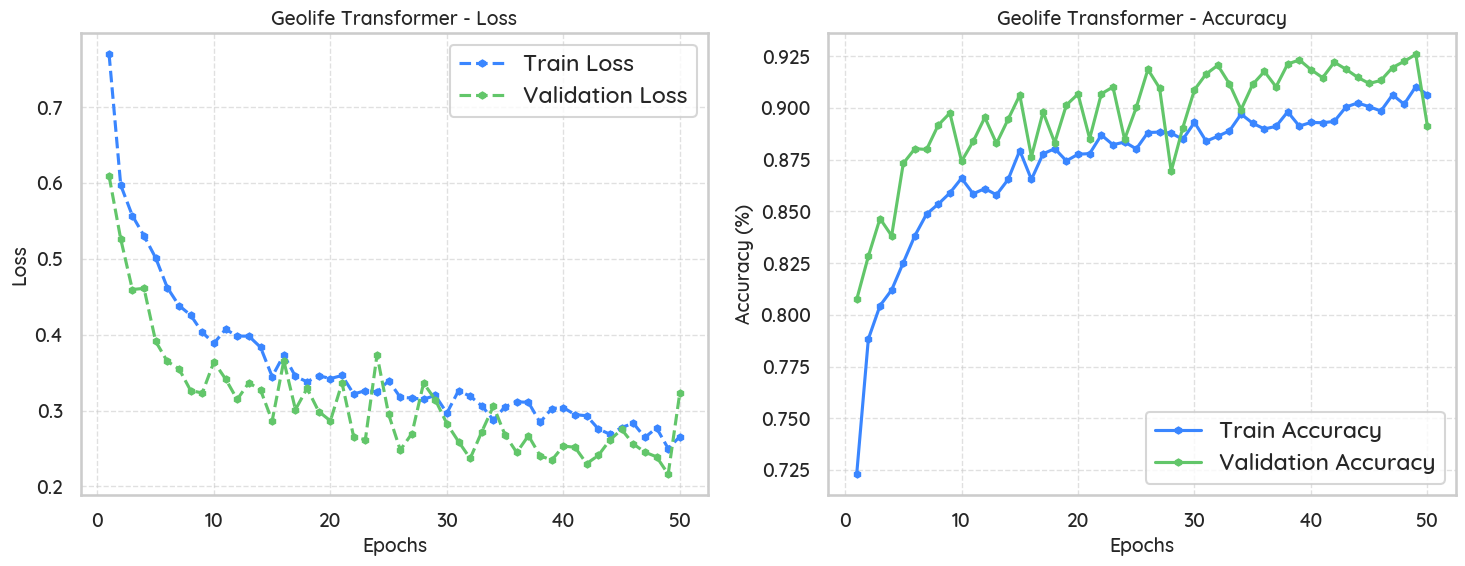

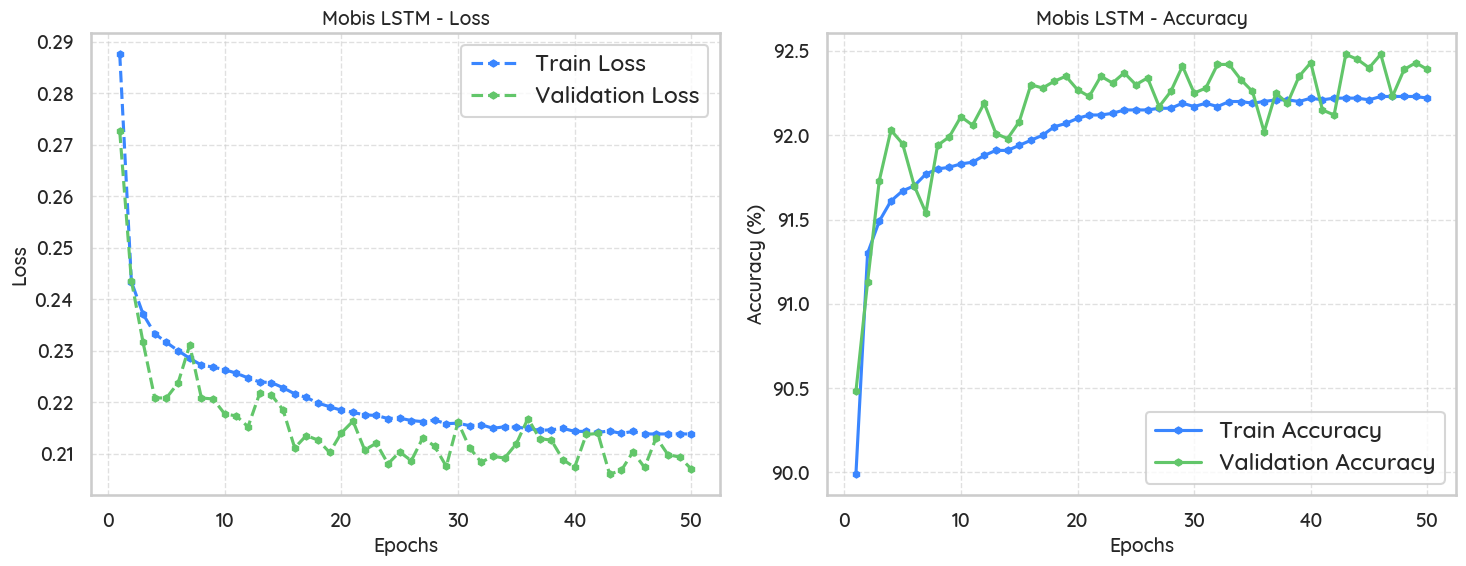

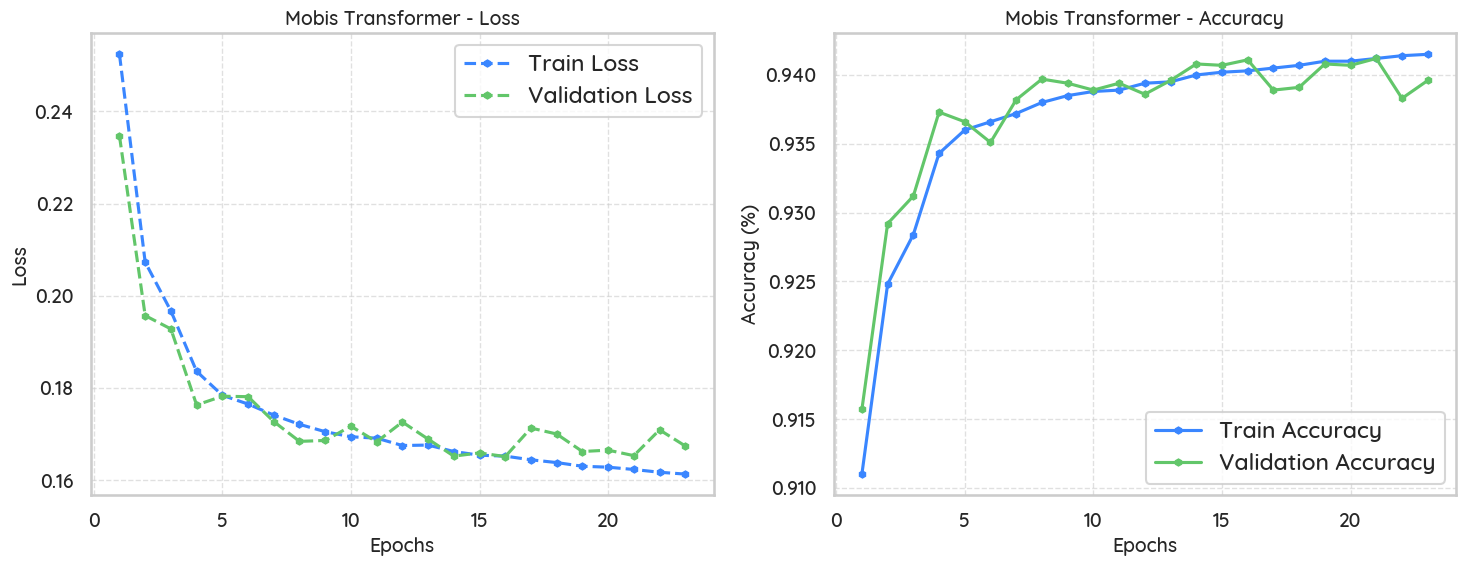

In [7]:
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for aesthetic plots
# sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-TrajectoryTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-TrajectoryTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-TrajectoryTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-TrajectoryTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure(figsize=(15,6))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', marker='h', markersize=5, linestyle='--', color='#3A86FF')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='h', markersize=5, linestyle='--', color='#62C66A')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='h', markersize=5, linestyle='-', color='#3A86FF')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='h', markersize=5, linestyle='-', color='#62C66A')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    save_path = f"{title.replace(' ', '_').lower()}.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Process each file and generate plots
for experiment_name, file_path in file_paths.items():
    # Determine patterns based on model type
    patterns = lstm_patterns if "LSTM" in experiment_name else transformer_patterns
    train_losses, train_accuracies, val_losses, val_accuracies = extract_metrics(file_path, patterns)

    epochs = list(range(1, len(train_accuracies) + 1))
    plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, experiment_name)

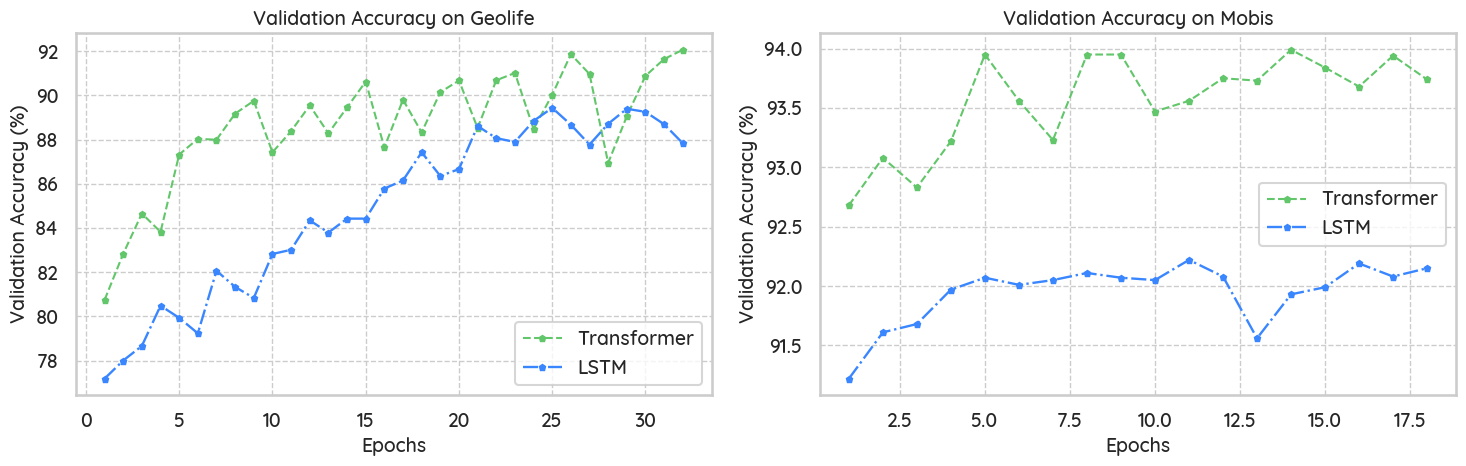

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for aesthetic plots
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-TrajectoryTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-TrajectoryTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-TrajectoryTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-TrajectoryTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_validation_comparison_side_by_side(geolife_data, mobis_data):
    plt.figure(figsize=(15, 5))

    # Determine the min length for both datasets
    min_length_geolife = min(len(geolife_data[1]), len(geolife_data[3]))
    min_length_mobis = min(len(mobis_data[1]), len(mobis_data[3]))

    # Limit data by min length
    geolife_data = (geolife_data[0][:min_length_geolife], 
                    geolife_data[1][:min_length_geolife],
                    geolife_data[2][:min_length_geolife],
                    geolife_data[3][:min_length_geolife])

    mobis_data = (mobis_data[0][:min_length_mobis], 
                  mobis_data[1][:min_length_mobis],
                  mobis_data[2][:min_length_mobis],
                  mobis_data[3][:min_length_mobis])

    # Geolife subplot
    plt.subplot(1, 2, 1)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = geolife_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color='#62C66A')
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color='#3A86FF')
    plt.title('Validation Accuracy on Geolife', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)

    # Mobis subplot
    plt.subplot(1, 2, 2)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = mobis_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color='#62C66A')
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color='#3A86FF')
    plt.title('Validation Accuracy on Mobis', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)

    plt.tight_layout()
    save_path = f"val.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Extract metrics for Geolife and Mobis
geolife_lstm_key = "Geolife LSTM"
geolife_transformer_key = "Geolife Transformer"
mobis_lstm_key = "Mobis LSTM"
mobis_transformer_key = "Mobis Transformer"

# Geolife data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[geolife_lstm_key], lstm_patterns)
epochs_lstm_geolife = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[geolife_transformer_key], transformer_patterns)
epochs_transformer_geolife = list(range(1, len(val_acc_transformer) + 1))

geolife_data = (epochs_lstm_geolife, val_acc_lstm, epochs_transformer_geolife, val_acc_transformer)

# Mobis data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[mobis_lstm_key], lstm_patterns)
epochs_lstm_mobis = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[mobis_transformer_key], transformer_patterns)
epochs_transformer_mobis = list(range(1, len(val_acc_transformer) + 1))

mobis_data = (epochs_lstm_mobis, val_acc_lstm, epochs_transformer_mobis, val_acc_transformer)

# Plot side-by-side comparison
plot_validation_comparison_side_by_side(geolife_data, mobis_data)

In [5]:
import pandas as pd

df = pd.read_csv("/data/A-TrajectoryTransformer/data/carbonClever.csv")

In [6]:
df

,time_diff,speed,distance,traj_id,label
0,16.788,4.491887,20.947168,0601950565e25f15004d2df34936918b,walk
1,17.315,1.150650,5.534309,0601950565e25f15004d2df34936918b,walk
2,20.078,3.033680,16.919507,0601950565e25f15004d2df34936918b,walk
3,11.285,6.326577,19.832063,0601950565e25f15004d2df34936918b,walk
4,10.025,0.264797,0.737387,0601950565e25f15004d2df34936918b,walk
...,...,...,...,...,...
179560,19.996,5.179121,28.767141,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179561,20.002,1.885010,10.473324,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179562,20.015,2.838603,15.781841,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179563,10.011,2.720535,7.565353,fd1ab1d5655d9f0c03379c7f03678ebc,bus


In [9]:
df = pd.read_csv("/data/A-TrajectoryTransformer/data/speed_statistics.csv")

In [10]:
df

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,153657,2.985856,3.282934,0.100014,14.999632,1073,0.276819,0.627175,1.784053,4.094780,7.653224
1,car,9976,31.353378,28.728154,3.000429,170.858602,87,4.863791,9.786224,22.618558,43.337544,69.207213
2,bus,12403,20.306541,24.912539,1.000494,119.996834,139,1.804636,3.304452,8.767582,28.245606,59.396761
3,bike,3407,17.281861,20.019437,0.501067,79.846176,21,0.981835,2.517154,7.232325,25.469017,52.233185
4,train,122,74.493633,52.575966,3.570093,256.157091,3,9.760043,31.817275,67.481839,102.198300,139.366369
